<a href="https://colab.research.google.com/github/cychen116/CSCI-Machine-Learning/blob/main/03_EDA_practice_dimond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find a regressor that will predict diamond prices better than the in-class regressor. It should have:
* Fewer errors > $2,500
* Fewer or no errors > 10% of price

The dataset to use is the diamond dataset (https://www.kaggle.com/shivam2503/diamonds).


# Data Loading

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
data_dir = ("/content/drive/MyDrive/Colab Notebooks/EMSE 6574_c/Data")
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6574_c/Data"

 cities_distance.csv			   ML_Iris
 cities_distance.xlsx			   News_Category_Dataset_v2.json
'Copy of News_Category_Dataset_v2.json'    pharma_sales.csv
 datasets_1474_2639_IMDB-Movie-Data.csv    pharma_sales.xlsx
 datasets_1474_2639_IMDB-Movie-Data.xlsx   StockPrice
 diamonds.csv				   tweets.json
'FEC dataset'


In [5]:
diamonds = pd.read_csv(data_dir+"/diamonds.csv")
diamonds = diamonds.drop(columns = 'Unnamed: 0')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Feature Engineering

In [8]:
# Split into X and y
X = diamonds.drop(columns = 'price')
y = diamonds['price']

# Label-encode categorical variables
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {
    'I3': 0, 'I2': 1, 'I1': 2, 'SI2': 3, 'SI1': 4, 'VS2': 5, 'VS1': 6, 
    'VVS2': 7, 'VVS1': 8, 'IF': 9, 'FL': 10
}
X['cut_le'] = X['cut'].apply(lambda x: cut_mapping[x])
X['color_le'] = X['color'].apply(lambda x: color_mapping[x])
X['clarity_le'] = X['clarity'].apply(lambda x: clarity_mapping[x])

# Drop unncessary columns
X = X.drop(columns = ['cut', 'color', 'clarity'])

# Scale all the features to zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# EDA

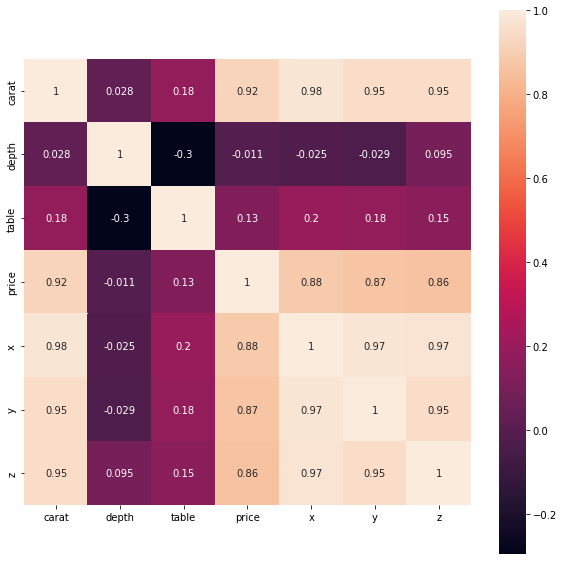

In [20]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(diamonds.corr(), annot=True ,square=True) 
#carat, size, table, depth, clararity

In [21]:
data = diamonds.drop(columns = ['cut', 'color', 'clarity'])
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Model Trining

## Data Split

In [10]:
# Do 80/20 split for the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

print(f'Training Shape: {X_train.shape}')
print(f'Testing Shape:  {X_test.shape}')

Training Shape: (43152, 9)
Testing Shape:  (10788, 9)


## Model Fitting

### Ridge Regression 

In [12]:
# Fit ridge regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# Get test predictions
y_pred_ridge = ridge_reg.predict(X_test)

### LASSO Regression

In [13]:
# Fit LASSO regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Get test predictions
y_pred_lasso = lasso_reg.predict(X_test)

### Random Forest Regression

In [14]:
# Fit Random Forest regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Get test predictions
y_pred_rf = rf_reg.predict(X_test)

### Support Vector Regression

In [15]:
# Fit support vector regression model
sv_reg = SVR()
sv_reg.fit(X_train, y_train)

# Get test predictions
y_pred_svr = sv_reg.predict(X_test)

## Model Evaluation

In [17]:
print(f'In-Class Support Vector Regression RMSE: {mean_squared_error(y_test, y_pred_svr, squared = False)}')
print(f'Ridge Regression RMSE:                   {mean_squared_error(y_test, y_pred_ridge, squared = False)}')
print(f'LASSO Regression RMSE:                   {mean_squared_error(y_test, y_pred_lasso, squared = False)}')
print(f'Random Forest Regression RMSE:           {mean_squared_error(y_test, y_pred_rf, squared = False)}')

In-Class Support Vector Regression RMSE: 2691.6538131517514
Ridge Regression RMSE:                   1204.1123229214065
LASSO Regression RMSE:                   1204.2140700846303
Random Forest Regression RMSE:           551.3617866062706


In [18]:
errors_ridge = y_test - y_pred_ridge
errors_lasso = y_test - y_pred_lasso
errors_rf = y_test - y_pred_rf
errors_svr = y_test - y_pred_svr

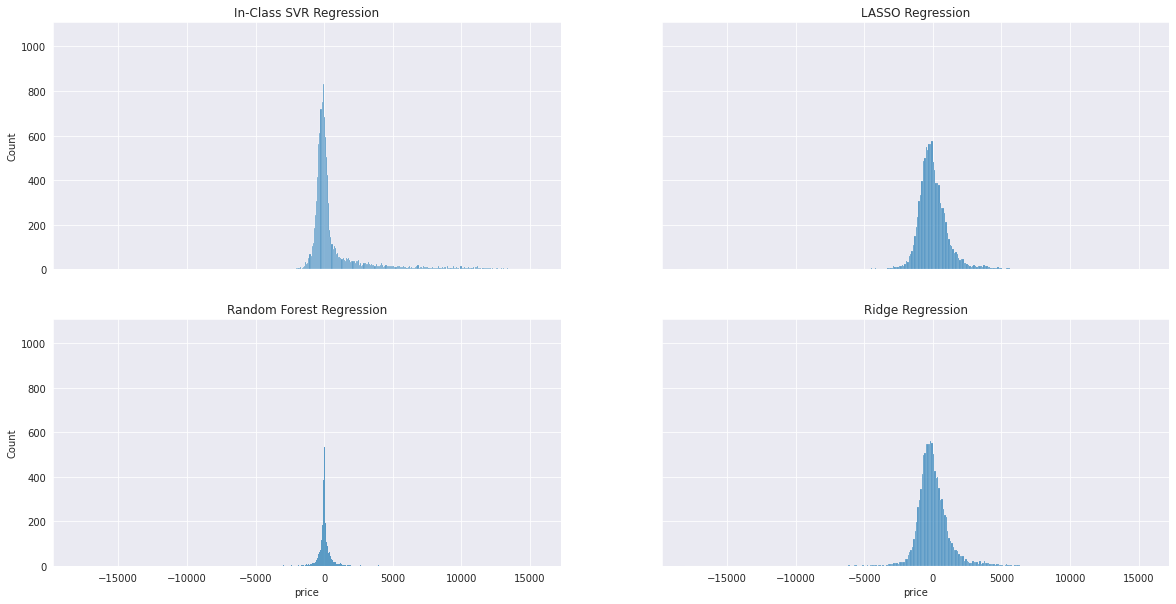

In [23]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10), sharex = True, sharey = True)
sns.histplot(errors_svr, ax = axs[0, 0]);
sns.histplot(errors_lasso, ax = axs[0, 1]);
sns.histplot(errors_rf, ax = axs[1, 0]);
sns.histplot(errors_ridge, ax = axs[1, 1]);
axs[0, 0].set_title('In-Class SVR Regression');
axs[0, 1].set_title('LASSO Regression');
axs[1, 0].set_title('Random Forest Regression');
axs[1, 1].set_title('Ridge Regression');